In [1]:
from utils import clear_start
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from nn import NeuralNetwork
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import construct_label
%matplotlib inline

In [2]:
def visualize_boundaries2D(nn, train_x, train_y, test_x=None, test_y=None, points=50, alpha=0.3):
    x_min, x_max = train_x[:, 0].min(), train_x[:, 0].max()
    y_min, y_max = train_x[:, 1].min(), train_x[:, 1].max()
    data = []
    for i in np.linspace(x_min, x_max, points):
        for j in np.linspace(y_min, y_max, points):
            data.append([i, j])
    data = np.array(data)
    labels = nn.predict(data)
    plt.scatter(*data.T, c=labels, alpha=alpha)
    if test_x is not None:
        if test_y is not None:
            plt.scatter(*test_x.T, c=test_y)
        else:
            plt.scatter(*test_x.T)
    else:
        plt.scatter(*train_x.T, c=train_y)
    plt.show()

In [3]:
random_state=17

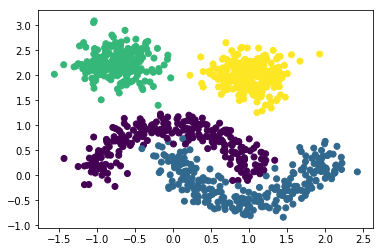

In [4]:
# making data for classification
moons, moon_labels = data.make_moons(n_samples=500, noise=0.15, random_state=random_state)
blobs, blob_labels = data.make_blobs(n_samples=500, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25, random_state=17)
X = np.vstack([moons, blobs])
y = np.hstack([moon_labels, blob_labels + 2])
plt.scatter(*X.T, c=y)

In [5]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=17)

In [6]:
# don't do this if your classification is binary
train_y = np.array([construct_label(i, 4) for i in train_y])
test_y = np.array([construct_label(i, 4) for i in test_y])

In [7]:
nn = NeuralNetwork(structure=[2, 10, 10, 4], verbose=False, random_state=random_state, cpu_only=False)

In [8]:
nn.fit(train_x, train_y, n_epochs=10, batch_size=32, learning_rate=0.01, beta=0.001)

100%|██████████| 10/10 [00:03<00:00,  3.27it/s]


In [9]:
nn.score(train_x, train_y)

0.97875

In [10]:
nn.score(test_x, test_y)

0.95

In [11]:
# use batch_size when the data or the network size is too large
test_pred = nn.predict(test_x, batch_size=32)
print(test_pred[:37])

[1 3 3 1 1 3 0 3 0 2 2 2 2 1 0 0 1 1 0 0 2 3 1 3 1 1 0 0 1 2 3 2 2 3 3 3 2]


In [12]:
test_pred = nn.predict_proba(test_x)
print(np.round(test_pred[:7], 2))

[[0.01 0.99 0.   0.  ]
 [0.03 0.   0.   0.97]
 [0.   0.   0.   1.  ]
 [0.01 0.99 0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.61 0.38 0.   0.  ]]


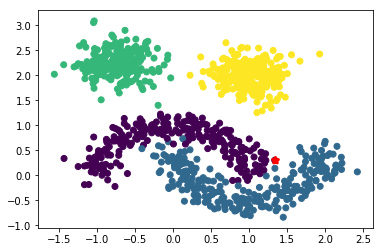

In [13]:
plt.scatter(*X.T, c=y)
plt.scatter(*np.expand_dims(test_x[6], 0).T, marker='*', linewidths=3, c='red')
plt.show()

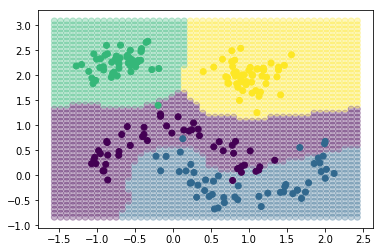

In [14]:
# dont use argmax if your classification is binary
# just run - visualize_boundaries2D(nn, train_x, train_y, test_x, test_y, axis=1)
visualize_boundaries2D(nn, train_x, np.argmax(train_y, axis=1), test_x, np.argmax(test_y, axis=1))

In [15]:
nn.save_pb('./nn.pb')

Converted 6 variables to const ops.


In [16]:
nn2 = NeuralNetwork()
nn2 = nn2.load_pb('./nn.pb')

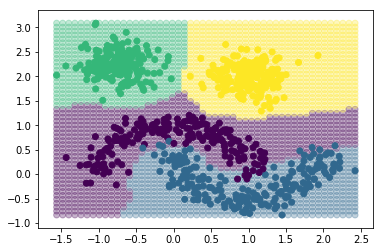

In [17]:
visualize_boundaries2D(nn2, train_x, np.argmax(train_y, axis=1))